In [1]:
# Import Generation and Reduction programs and other necessary programs for the Solver
from Generation.Generation import Generator
from Reduction.Reduction import Reducer
import subprocess
import tempfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
# Global Constants
N_MIN = 2
N_MAX = 5
K_VALUE = 1 # one random number
PATH_NAME = 'tmp_out'
NUM_BOARDS = 10
cnf_files = []

In [3]:
def get_solution_from_cnf(cnf_string, cnf_file):
    
    cnf_string = cnf + cnf_string #append the whole cnf
    
    bashCommand = 'minisat %s %s' # command to run on the terminal
    
     # Our temporary input/output files 
    input_file = tempfile.NamedTemporaryFile(mode="w")
    output_file = tempfile.NamedTemporaryFile()
    
    # Count number of clauses
    clause_count = len(cnf_string.splitlines())
    
    # writes the file with DIMACS suitable header
    input_file.write("p cnf " + str(VAR_COUNT) + " " + str(clause_count) + "\n" + cnf_string)
 
    # call the bash terminal
    subprocess.call(bashCommand % (input_file.name, output_file.name), shell=True, stdout = subprocess.PIPE)
    
    input_file.close()
    
    return output_file.read().decode("utf-8") 

In [4]:
frame_list = []
for order in range(N_MIN,N_MAX):
    boards = []
    for n in range(NUM_BOARDS):
        generator = Generator(PATH_NAME, order*order, K_VALUE)
        generator.generate()
        boards.append(generator.board)
    boards = pd.DataFrame(boards,columns=['board'])
    boards['order']=order
    boards['solve_time'] = np.nan
    frame_list.append(boards)
    
    


Generated Board: 
0 0 | 0 0  
0 0 | 1 0  
--+----+--
0 0 | 0 0  
0 0 | 0 0  
Generated Board: 
0 0 | 0 0  
0 0 | 0 3  
--+----+--
0 0 | 0 0  
0 0 | 0 0  
Generated Board: 
0 0 | 0 0  
0 0 | 0 0  
--+----+--
0 3 | 0 0  
0 0 | 0 0  
Generated Board: 
0 0 | 0 0  
0 0 | 0 0  
--+----+--
0 1 | 0 0  
0 0 | 0 0  
Generated Board: 
0 0 | 0 0  
0 2 | 0 0  
--+----+--
0 0 | 0 0  
0 0 | 0 0  
Generated Board: 
0 0 | 0 0  
0 0 | 0 0  
--+----+--
0 0 | 0 0  
0 3 | 0 0  
Generated Board: 
1 0 | 0 0  
0 0 | 0 0  
--+----+--
0 0 | 0 0  
0 0 | 0 0  
Generated Board: 
0 0 | 0 0  
0 0 | 0 0  
--+----+--
0 0 | 0 1  
0 0 | 0 0  
Generated Board: 
2 0 | 0 0  
0 0 | 0 0  
--+----+--
0 0 | 0 0  
0 0 | 0 0  
Generated Board: 
0 4 | 0 0  
0 0 | 0 0  
--+----+--
0 0 | 0 0  
0 0 | 0 0  
Generated Board: 
4 0 0 | 0 0 0 | 0 0 0  
0 0 0 | 0 0 0 | 0 0 0  
0 0 0 | 0 0 0 | 0 0 0  
---+------+------+---
0 0 0 | 0 0 0 | 0 0 0  
0 0 0 | 0 0 0 | 0 0 0  
0 0 0 | 0 0 0 | 0 0 0  
---+------+------+---
0 0 0 | 0 0 0 | 0 0 0  


In [5]:
frames = pd.concat(frame_list)

In [6]:
import os
solve_time = []
gen_times = {}
for n in range(N_MIN,N_MAX):
    gen_start = time.time()
    reducer = Reducer(PATH_NAME, size=n*n, k_value=K_VALUE)
    cnf_master = reducer.return_cnf_data()
    gen_end = time.time()
    gentime = gen_end-gen_start
    gen_times[n]=(gentime)
    print("It took {} to generate a board of order {} and the board is of size {}".format(gentime,n,len(cnf_master)))
    for board in frames.board[frames.order==n]:
        # begin timing       
        input_file = tempfile.NamedTemporaryFile(mode="w")
        input_file.write(cnf_master)
        input_file.write(board.cnf_output())
        bashCommand = 'minisat %s %s' # command to run on the terminal
        output_file = tempfile.NamedTemporaryFile()
        # time the subprocess call
        time_start = time.time()
        subprocess.call(bashCommand % (input_file.name, output_file.name), shell=True, stdout = subprocess.PIPE)
        time_end = time.time()
        # end timing
        solve_time.append(time_end-time_start)
        print("Time to calculate grid of order {}: {}".format(n,time_end-time_start))
        input_file.close()
        output_file.close()
frames.solve_time = solve_time

It took 0.0006821155548095703 to generate a board of order 2 and the board is of size 5957
Time to calculate grid of order 2: 0.00934910774230957
Time to calculate grid of order 2: 0.007260560989379883
Time to calculate grid of order 2: 0.013869762420654297
Time to calculate grid of order 2: 0.005201101303100586
Time to calculate grid of order 2: 0.005052089691162109
Time to calculate grid of order 2: 0.004933595657348633
Time to calculate grid of order 2: 0.005070924758911133
Time to calculate grid of order 2: 0.005029439926147461
Time to calculate grid of order 2: 0.005132913589477539
Time to calculate grid of order 2: 0.005164384841918945
It took 0.012354612350463867 to generate a board of order 3 and the board is of size 152739
Time to calculate grid of order 3: 0.010876655578613281
Time to calculate grid of order 3: 0.010931015014648438
Time to calculate grid of order 3: 0.010846614837646484
Time to calculate grid of order 3: 0.01071476936340332
Time to calculate grid of order 3: 

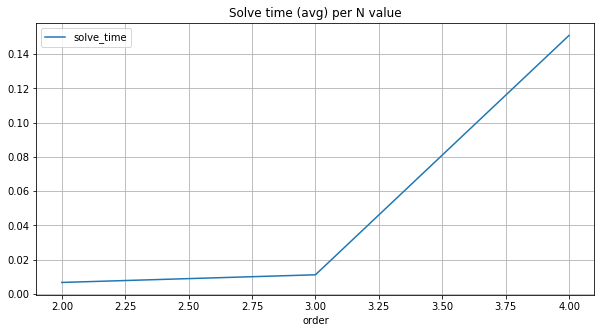

In [7]:
frames.groupby('order').mean().plot(figsize=(10,5),grid=True, title="Solve time (avg) per N value")
plt.savefig("n vs solve time")
pass

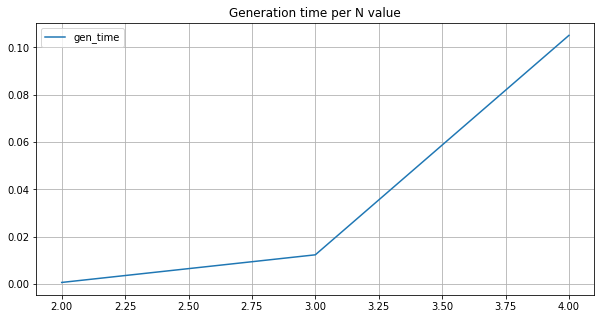

In [8]:
pd.DataFrame.from_dict(gen_times, orient='index', columns=['gen_time']).plot(figsize=(10,5), grid=True, title="Generation time per N value")
plt.savefig("nvgentime")
pass

<h1>Testing K values in Order 9

In [164]:
K_MIN = 1
K_MAX = 20
BOARDS_PER_K = 500
N_K_TEST = 9

In [165]:
k_test_list = []
for k in range(K_MIN, K_MAX):
    boards = []
    for n in range(BOARDS_PER_K):
        generator = Generator(path='ktest', size=N_K_TEST, k_value=k)
        generator.generate(print_board=False,save=False)
        boards.append(generator.board)
    boards = pd.DataFrame(boards,columns=['board'])
    boards['k_value']=k
    boards['solve_time'] = np.nan
    boards['SAT_output'] = ""
    k_test_list.append(boards)
k_test = pd.concat(k_test_list)

In [166]:
k_test.head(5)

,board,k_value,solve_time,SAT_output
0,<sudoku.Sudoku object at 0x7f6de5cc53c8>,1,NaN,
1,<sudoku.Sudoku object at 0x7f6de5cd4b38>,1,NaN,
2,<sudoku.Sudoku object at 0x7f6de5cd4240>,1,NaN,
3,<sudoku.Sudoku object at 0x7f6de7b64160>,1,NaN,
4,<sudoku.Sudoku object at 0x7f6de5ddb128>,1,NaN,


In [167]:
k_test.tail(5)

,board,k_value,solve_time,SAT_output
495,<sudoku.Sudoku object at 0x7f6de5a32240>,19,NaN,
496,<sudoku.Sudoku object at 0x7f6de5a32278>,19,NaN,
497,<sudoku.Sudoku object at 0x7f6de5a322b0>,19,NaN,
498,<sudoku.Sudoku object at 0x7f6de5a322e8>,19,NaN,
499,<sudoku.Sudoku object at 0x7f6de5a32320>,19,NaN,


In [168]:
k_solve_times = []
k_SAT_output = []
for k_val in range(K_MIN, K_MAX):
    reducer = Reducer(path='ktest', size=N_K_TEST, k_value=k_val)
    cnf_master = reducer.return_cnf_data()
    print("solving for Kval {}".format(k_val))
    iter = 0
    for board in k_test.board[k_test.k_value==k_val]:
        # begin timing       
        k_input_file = tempfile.NamedTemporaryFile(mode='w+')
        k_input_file.write(cnf_master)
        k_input_file.write(board.cnf_output())
        k_input_file.seek(0)
#         if iter %50==0:
#             print(k_input_file.read())
        bashCommand = 'minisat %s %s' # command to run on the terminal
        output_file = tempfile.NamedTemporaryFile()
        # time the subprocess call
        time_start = time.time()
        subprocess.call(bashCommand % (k_input_file.name, output_file.name), shell=True, stdout = subprocess.PIPE)
        time_end = time.time()
        # end timing
        k_solve_times.append(time_end-time_start)
        k_SAT_output.append(output_file.read().decode("utf-8"))
#         k_SAT_output.append(k_input_file.read())
        input_file.close()
        output_file.close()
        iter += 1
k_test.solve_time = k_solve_times
k_test.SAT_output = k_SAT_output

solving for Kval 1
solving for Kval 2
solving for Kval 3
solving for Kval 4
solving for Kval 5
solving for Kval 6
solving for Kval 7
solving for Kval 8
solving for Kval 9
solving for Kval 10
solving for Kval 11
solving for Kval 12
solving for Kval 13
solving for Kval 14
solving for Kval 15
solving for Kval 16
solving for Kval 17
solving for Kval 18
solving for Kval 19


In [169]:
k_test[k_test.SAT_output=='UNSAT\n'].solve_time.mean()

0.01742778803167824

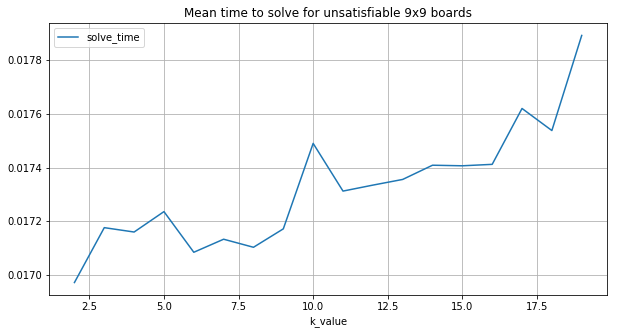

In [177]:
k_test[k_test.SAT_output=='UNSAT\n'].groupby('k_value').mean().plot(figsize=(10,5),grid=True,title="Mean time to solve for unsatisfiable 9x9 boards")
plt.savefig("meansolveunsat_k")
pass

In [171]:
k_test[k_test.SAT_output!='UNSAT\n'].solve_time.mean()

0.02084702919131226

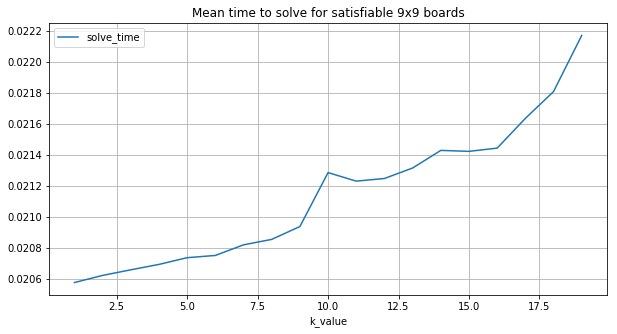

In [178]:
k_test[k_test.SAT_output!='UNSAT\n'].groupby('k_value').mean().plot(figsize=(10,5),grid=True,title="Mean time to solve for satisfiable 9x9 boards")
plt.savefig("meansolvesat_k")
pass

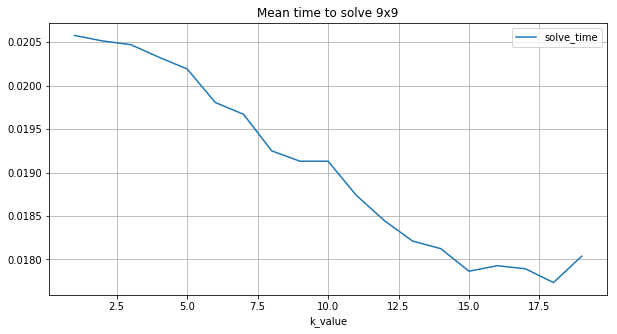

In [179]:
k_test.groupby('k_value').mean().plot(figsize=(10,5),grid=True,title="Mean time to solve 9x9")
plt.savefig("meansolve_k")

In [212]:
k_test.groupby('k_value').count()

,board,solve_time,SAT_output
k_value,,,
1,500,500,500
2,500,500,500
3,500,500,500
4,500,500,500
5,500,500,500
6,500,500,500
7,500,500,500
8,500,500,500
9,500,500,500
